# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
from pandas_datareader import data as web

In [2]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Ver la siguiente función...

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    closes = web.DataReader(tickers, start=start_date, end=end_date, data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes

In [4]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ['AAPL', 'WMT', 'IBM', 'NKE']
# Fechas: inicios 2011 a finales de 2015
start = '2011-01-01'
end = '2015-12-31'

In [32]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [5]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(tickers=names,
                    start_date=start,
                    end_date=end)

In [10]:
# Observemos los primeros datos
closes.head(10)

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,10.138556,42.653534,104.999786,19.012272
2011-01-04,10.191467,42.817699,105.113693,18.544088
2011-01-05,10.274836,42.536278,104.693611,18.665546
2011-01-06,10.266529,42.184471,105.839890,18.497717
2011-01-07,10.340052,42.278286,105.320175,18.446915
2011-01-10,10.534782,42.004665,105.113693,18.588259
2011-01-11,10.509866,42.442463,104.857391,18.555124
2011-01-12,10.595387,42.880253,106.153160,18.491085
2011-01-13,10.634145,42.833344,105.953812,18.232700


In [9]:
# Observemos los últimos datos
closes.tail(5)

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2015-12-24,24.984346,54.038994,109.742485,59.594948
2015-12-28,24.704502,53.967915,109.234459,60.189201
2015-12-29,25.148544,54.731907,110.957001,60.613670
2015-12-30,24.820139,54.794090,110.607735,59.660965
2015-12-31,24.343718,54.456516,109.242401,58.953518


¿Cómo lucen estos datos?

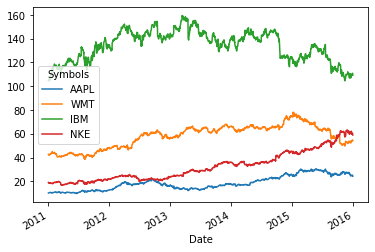

In [11]:
# Graficar
closes.plot()

In [12]:
type(closes)

pandas.core.frame.DataFrame

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [13]:
# Método describe
closes.describe()

Symbols,AAPL,WMT,IBM,NKE
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,18.435906,57.991789,134.067345,32.205309
std,5.902849,9.643200,12.592737,12.215063
min,9.700181,38.640587,104.582794,16.721195
25%,13.479133,49.134028,123.815262,21.659732
50%,17.329329,60.894516,136.859062,29.033181
75%,22.925752,65.001461,143.603874,40.551051
max,30.384638,78.195717,159.538162,63.200623


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [17]:
# Método pct_change
returns = closes.pct_change().dropna()

In [18]:
returns.head()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008271,0.010949,-0.008991
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018833,-0.006472,-0.001961,0.007662


In [19]:
returns.tail()

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2015-12-24,-0.005340,-0.004256,-0.002093,-0.018258
2015-12-28,-0.011201,-0.001315,-0.004629,0.009972
2015-12-29,0.017974,0.014156,0.015769,0.007052
2015-12-30,-0.013059,0.001136,-0.003148,-0.015718
2015-12-31,-0.019195,-0.006161,-0.012344,-0.011858


y la gráfica de los rendimientos se puede obtener como...

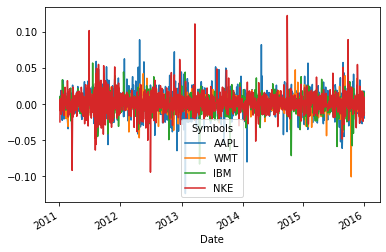

In [20]:
# Gráfica
returns.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [21]:
x = np.linspace(-0.9, 1)
y1 = x
y2 = np.log(1 + x)

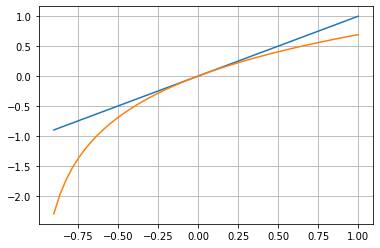

In [23]:
plt.plot(x, y1, x, y2)
plt.grid()

In [26]:
# Rendimiento logarítmico
log_returns = np.log(closes / closes.shift()).dropna()

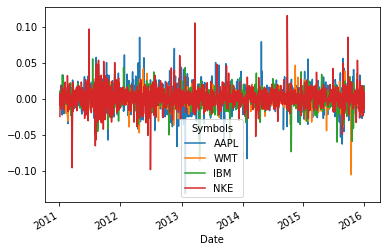

In [27]:
# Gráfica
log_returns.plot()

In [28]:
# Valor absoluto de la diferencia
np.abs(returns - log_returns)

Symbols,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,1.357108e-05,7.387733e-06,5.880022e-07,0.000308
2011-01-05,3.327654e-05,2.169435e-05,8.007165e-06,0.000021
2011-01-06,3.269572e-07,3.439236e-05,5.950510e-05,0.000041
2011-01-07,2.552095e-05,2.469248e-06,1.209554e-05,0.000004
2011-01-10,1.751392e-04,2.103351e-05,1.924328e-06,0.000029
...,...,...,...,...
2015-12-24,1.430911e-05,9.081895e-06,2.193791e-06,0.000169
2015-12-28,6.320117e-05,8.658093e-07,1.074819e-05,0.000049
2015-12-29,1.596250e-04,9.926633e-05,1.230423e-04,0.000025


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [29]:
# Media y volatilidad de rendimientos
returns.mean()

Symbols
AAPL    0.000838
WMT     0.000246
IBM     0.000105
NKE     0.001013
dtype: float64

In [30]:
returns.std()

Symbols
AAPL    0.016777
WMT     0.010152
IBM     0.012129
NKE     0.015021
dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>